# An Investigation in classifying the gender of players using their hours played and age

# INTRODUCTION

A research group in Computer Science at UBC, led by Frank Wood, collected data about how people play video games. They have set up a MineCraft server, and players' actions are recorded as they navigate through the world.

The research group gathered two datasets. The question we would want to answer with our project would be "Can we predict the gender if given the age and hours played on the MineCraft server?" So, we are only focusing on the first dataset, "players.csv", to answer our question.

The first dataset, players.csv, is a list of all unique players, including data about each player. In this dataset, there are 196 observations in total, and there are 7 variables for each observation. The variable “experience” is a categorical value which describes the player’s proficiency level in this video game, specifically, five levels: "Amateur", "Beginner", "Regular", "Veteran" and "Pro". The variable “subscribe” is a “lgl” value that identifies whether the player subscribed to MineCraft’s newsletter. The variable “hashedEmail” is a “chr” value which provides an encrypted email address from the player. The variable “played_hours” is a “dbl” value that gives the total time a player spent on the MineCraft server. The “name” variable is a “chr” value that has each player’s first name. The “gender” value is a categorical value which provides each player’s gender, specifically, 7 categories: “Agender”, “Female”, “Male”, “Non-binary”, “Two-Spirited”, “Other” and “Prefer not to say”. The variable “Age” is a quantitative variable that provides each individual player’s age. The potential issue that we want to clean and wrangle in this dataset before further steps would be the “NA” values in the “Age” column.


# DATA ANALYSIS

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


played_hours,gender,Age
<dbl>,<fct>,<dbl>
30.3,Male,9
3.8,Male,17
0.0,Male,17
⋮,⋮,⋮
0.3,Male,22
0.0,Prefer not to say,17
2.3,Male,17


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


played_hours,gender,Age,scaled_age,scaled_played_hours
<dbl>,<fct>,<dbl>,"<dbl[,1]>","<dbl[,1]>"
30.3,Male,9,-1.8657878,0.85603962
3.8,Male,17,-0.5701714,-0.07385234
0.0,Male,17,-0.5701714,-0.20719534
⋮,⋮,⋮,⋮,⋮
0.3,Male,22,0.2395889,-0.1966683
0.0,Prefer not to say,17,-0.5701714,-0.2071953
2.3,Male,17,-0.5701714,-0.1264877


→ A | warning: ✖ No observations were detected in `truth` for level: Two-Spirited.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

→ B | warning: ✖ No observations were detected in `truth` for level: Agender.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x2





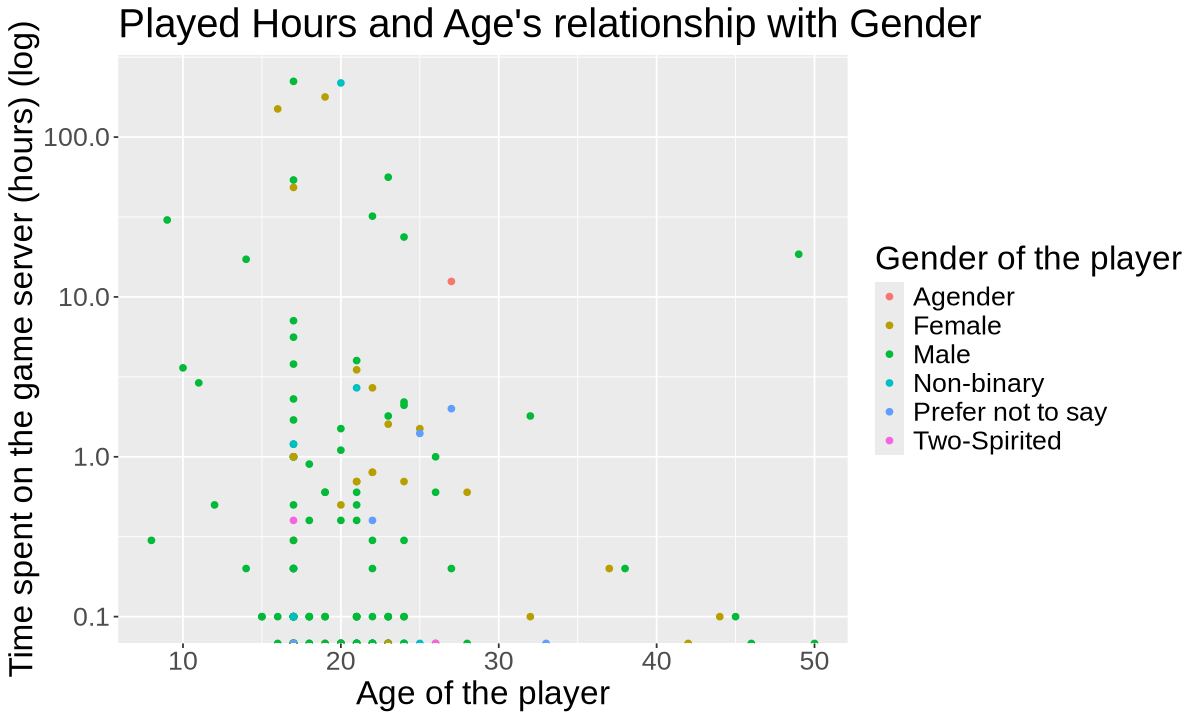

parsnip model object


Call:
kknn::train.kknn(formula = gender ~ Age + played_hours, data = data,     ks = min_rows(5, data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.461039
Best kernel: rectangular
Best k: 5

ERROR: Error in eval(expr, envir, enclos): object 'mnist_conf_mat' not found


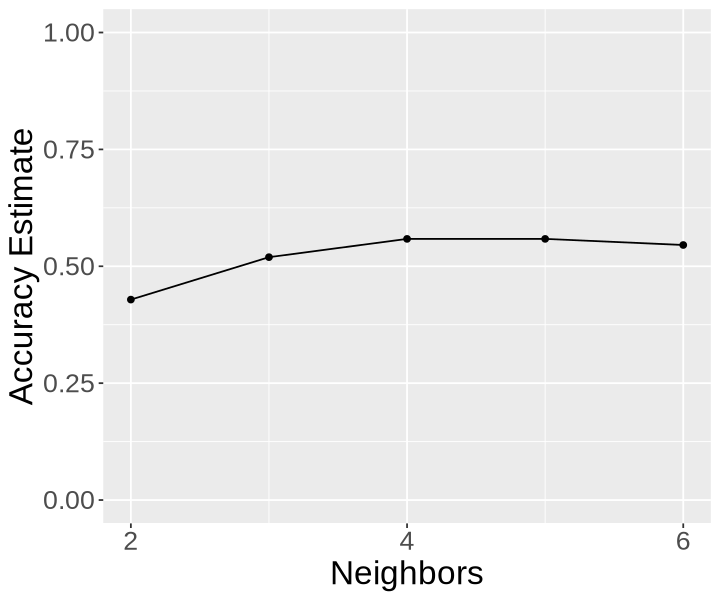

In [40]:
# loading the dataset players_csv
players <- read_csv("https://raw.githubusercontent.com/Ivy-Z-Z/DSCI100-010-group_project/refs/heads/main/players.csv")

# cleaning and wrangling
players_clean <- players |>
    select(played_hours, gender, Age) |>
    filter(Age != "NA") |>
    mutate(gender = as.factor(gender))
players_clean

options(repr.plot.width=10, repr.plot.height=6)
players_plot <- ggplot(players_clean, aes(x = Age, y = played_hours, colour = gender)) +
                geom_point() +
                scale_y_log10() +
                labs(x = "Age of the player",
                     y = "Time spent on the game server (hours) (log)",
                     colour = "Gender of the player", 
                     title = "Played Hours and Age's relationship with Gender") +
                theme(text = element_text(size = 20))
players_plot

# scale the data
players_scaled <- players_clean |> 
    mutate(scaled_age = scale(Age, center = TRUE),
           scaled_played_hours = scale (played_hours, center = TRUE))
players_scaled

# split the dataset into the training set and the test set
players_split <- initial_split(players_scaled, prop = 0.8, strata = gender)
players_train <- training (players_split)
players_test <- testing (players_split) |>
    na.omit(players_test)

# cross-validation
set.seed(1234) 
options(repr.plot.height = 5, repr.plot.width = 6)


knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

players_recipe <- recipe (gender ~ played_hours + Age, data = players_clean) 

players_vfold <- vfold_cv(players_train, v = 3, strata = gender)

k_vals <- c(2,3,4,5,6)

knn_results <- workflow() |>
       add_recipe(players_recipe) |>
       add_model(knn_spec) |>
       tune_grid(resamples = players_vfold, grid = tibble(neighbors = k_vals)) |>
       collect_metrics()

accuracies <- knn_results |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) +
                  scale_x_continuous(breaks = seq(0, 20, 2)) +
                  scale_y_continuous(limits = c(0.0, 1))
cross_val_plot


#makingthemodel

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
            set_engine("kknn") |>
            set_mode("classification")

players_train <- players_train |> mutate(gender = as.factor(gender))
players_fit <- knn_spec |>
    fit(gender ~ Age + played_hours, data = players_train)
players_fit

# nrow(players_test) 
# nrow(predict(players_fit, players_test)) 

players_predictions <- predict(players_fit, players_test) |>
    bind_cols(players_test)

players_metrics <- players_predictions |>
    metrics(truth = gender, estimate = .pred_class) |>
    filter(.metric == "accuracy")

players_conf_mat <- players_predictions |>
    conf_mat(truth = gender, estimate = .pred_class)

mnist_conf_mat

# METHODS

The three columns of data we are using from the dataset are “played_hours”, “gender” and “Age”. “Gender” would be the factor we want to predict in the analysis, while “played_hours” and “Age” would be our two predictors. We are using the K-nearest neighbor classification method to predict the gender of players since the gender is categorical data. After cleaning and wrangling the dataset, we split the dataset randomly into two parts: training and testing, where the training set contains 80% of the data and the testing set has 20%. After that, we will find the best fit K value using cross-validation, and then we can apply the classification model with the best fit K value we built to predict the factor.

# DISCUSSION